In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

PATH = '/home/tbrownex/data/Hackett/JLP/UseCase2/'
FILE = 'BranchSalesDriver'

In [2]:
df = pd.read_csv(PATH+FILE)

In [3]:
ppc          = df["PPC Spend"]
onlineSales  = df["Online Sales"]
roi          = df["Sales ROI"]
branchSales  = df["Branch Sales"]
onlineProfit = df["Online Profit"]

ppc   = np.array(ppc).reshape([-1,1])
os    = np.array(onlineSales).reshape([-1,1])
roi   = np.array(roi).reshape([-1,1])
bs    = np.array(branchSales).reshape([-1,1])
op    = np.array(onlineProfit).reshape([-1,1])

In [4]:
# Get the data sorted by ppc for plotting
idx = np.array(ppc).argsort(axis=0).reshape([-1,])

ppc = ppc[idx]
os  = os[idx]
roi = roi[idx]
bs  = bs[idx]
op  = op[idx]

##### ppc vs Online Sales 

Text(0.5,1,'PPC vs Online Sales')

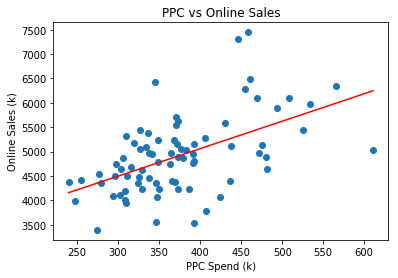

In [5]:
regr = linear_model.LinearRegression()
lr   = regr.fit(ppc, os)
m    = lr.coef_
b    = lr.intercept_
R2   = lr.score(ppc, os)

Y = lr.predict(ppc)

R2 = "R-squared: " + str(round(R2,2))
m = np.float(m[0])
m  = "Slope: " + str(round(m,2))
plt.scatter(ppc/1000, os/1000)
plt.plot(ppc/1000,Y/1000,color="r")
plt.xlabel('PPC Spend (k)')
plt.ylabel("Online Sales (k)")
plt.title("PPC vs Online Sales")
#plt.legend([(R2, m)], loc=2, fontsize="small")
#plt.show()
#plt.savefig("/home/tbrownex/fig1.png", bbox_inches='tight')
#plt.close()

In [6]:
R2

'R-squared: 0.28'

##### PPC histogram

In [10]:
plt.hist(ppc/1000)
plt.ylabel("# of Weeks")
plt.xlabel("PPC Spend (k)")
#plt.show()
plt.savefig("/home/tbrownex/fig2.png", bbox_inches='tight')
plt.close()

##### Branch Sales vs Online

In [18]:
plt.plot(bs, os)
plt.savefig("/home/tbrownex/fig10.png", bbox_inches='tight')
plt.close()

##### ppc vs Branch Sales

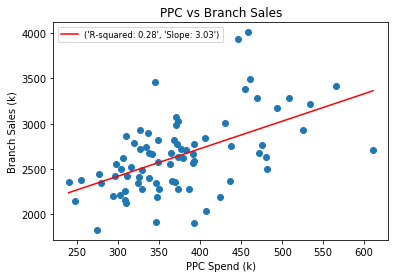

In [14]:
regr = linear_model.LinearRegression()
lr   = regr.fit(ppc, bs)
m    = lr.coef_
b    = lr.intercept_
R2   = lr.score(ppc, bs)

Y = lr.predict(ppc)

R2 = "R-squared: " + str(round(R2,2))
m = np.float(m[0])
m  = "Slope: " + str(round(m,2))
plt.scatter(ppc/1000, bs/1000)
plt.plot(ppc/1000,Y/1000,color="r")
plt.xlabel('PPC Spend (k)')
plt.ylabel("Branch Sales (k)")
plt.title("PPC vs Branch Sales")
plt.legend([(R2, m)], loc=2, fontsize="small")
plt.show()
#plt.savefig("/home/tbrownex/fig8.png", bbox_inches='tight')
#plt.close()

##### ppc vs Sales ROI

In [9]:
svPPC = ppc
svROI = roi

df2017 = df.loc[(df["Year"]==2017) | (df["Year"]==2018)]
ppc          = df2017["PPC Spend"]
roi          = df2017["Sales ROI"]

ppc   = np.array(ppc).reshape([-1,1])
roi   = np.array(roi).reshape([-1,1])

regr = linear_model.LinearRegression()
lr   = regr.fit(ppc, roi)
m    = lr.coef_
b    = lr.intercept_
R2   = lr.score(ppc, roi)

Y = lr.predict(ppc)

R2 = "R-squared: " + str(round(R2,2))
m = np.float(m[0])
m  = "Slope: " + str(round(m,6))
plt.scatter(ppc/1000, roi)
plt.plot(ppc/1000,Y,color="r")
plt.xlabel('PPC Spend (k)')
plt.ylabel("Sales ROI")
plt.title("PPC vs Sales ROI")
plt.savefig("/home/tbrownex/fig9.png", bbox_inches='tight')
plt.close()
ppc = svPPC
roi = svROI